In [7]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
#matplotlib inline
from icecream import ic

from fbprophet import Prophet
from datetime import datetime


In [8]:
poy_web = pd.read_csv('./data/08. PinkWink Web Traffic.csv',
                      encoding = 'UTF-8', thousands = ',',
                      names = ['date', 'hit'], index_col = 0)
poy_web = poy_web[poy_web['hit'].notnull()]
poy_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


<AxesSubplot:xlabel='date'>

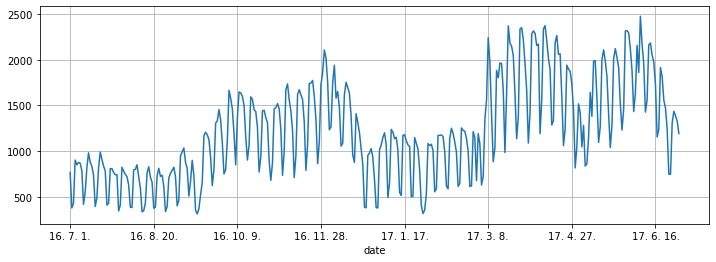

In [9]:
poy_web['hit'].plot(figsize = (12, 4), grid = True)

In [10]:
time = np.arange(0, len(poy_web))
traffic = poy_web['hit'].values

fx = np.linspace(0, time[-1], 1000)

In [11]:
def error(f, x, y):
    return np.sqrt(np.mean((f(x) - y) **2 ))

In [12]:
# 1차 다항식
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)

# 2차 다항식
f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)

# 3차 다항식
f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)

# 15차 다항식
f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)

# 각 차수별 다항식의 '잔차 제곱합'을 계산
ic(error(f1, time, traffic))
ic(error(f2, time, traffic))
ic(error(f3, time, traffic))
ic(error(f15, time, traffic))

ic| error(f1, time, traffic): 430.85973081109626
ic| error(f2, time, traffic): 430.6284101894695
ic| error(f3, time, traffic): 429.53280466762925
ic| error(f15, time, traffic): 330.4777304274343


330.4777304274343

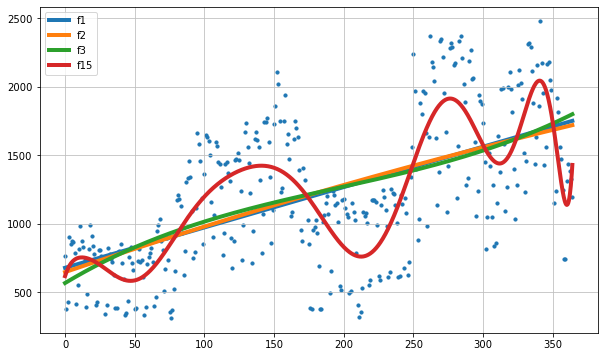

In [15]:
plt.figure(figsize = (10, 6))
plt.scatter(time, traffic, s = 10)

plt.plot(fx, f1(fx), lw = 4, label = 'f1')
plt.plot(fx, f2(fx), lw = 4, label = 'f2')
plt.plot(fx, f3(fx), lw = 4, label = 'f3')
plt.plot(fx, f15(fx), lw = 4, label = 'f15')

plt.grid(True, linestyle = '-', color = '0.75')

plt.legend(loc = 2)
plt.show()

In [22]:
df = pd.DataFrame({'ds': poy_web.index, 'y': poy_web['hit']})
df.reset_index(inplace=True)

df['ds'] = pd.to_datetime(df['ds'], format = "%y. %m. %d.")

# 'ds' 변수를 생성해줬으므로, 'date' 변수는 삭제
del df['date']

m = Prophet(yearly_seasonality = True, daily_seasonality = True)
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [23]:
future = m.make_future_dataframe(periods = 60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [25]:
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-07-01,825.908758,530.230481,951.806031,825.908758,825.908758,-89.203321,-89.203321,-89.203321,241.465995,...,-51.503692,-51.503692,-51.503692,-279.165624,-279.165624,-279.165624,0.0,0.0,0.0,736.705437
1,2016-07-02,826.717037,98.317746,518.296070,826.717037,826.717037,-521.745203,-521.745203,-521.745203,241.465995,...,-467.504111,-467.504111,-467.504111,-295.707087,-295.707087,-295.707087,0.0,0.0,0.0,304.971834
2,2016-07-03,827.525316,218.167371,626.483662,827.525316,827.525316,-403.033522,-403.033522,-403.033522,241.465995,...,-335.342351,-335.342351,-335.342351,-309.157166,-309.157166,-309.157166,0.0,0.0,0.0,424.491793
3,2016-07-04,828.333595,748.646413,1163.692660,828.333595,828.333595,139.019272,139.019272,139.019272,241.465995,...,217.283657,217.283657,217.283657,-319.730380,-319.730380,-319.730380,0.0,0.0,0.0,967.352866
4,2016-07-05,829.141874,803.878063,1213.437662,829.141874,829.141874,167.238924,167.238924,167.238924,241.465995,...,253.456750,253.456750,253.456750,-327.683821,-327.683821,-327.683821,0.0,0.0,0.0,996.380798


In [26]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,896.576571,702.239165,1101.297312
421,2017-08-26,481.544412,270.692947,690.377331
422,2017-08-27,614.212001,407.248889,821.039128
423,2017-08-28,1166.966207,957.059135,1375.846645
424,2017-08-29,1203.000155,1008.968625,1420.884929


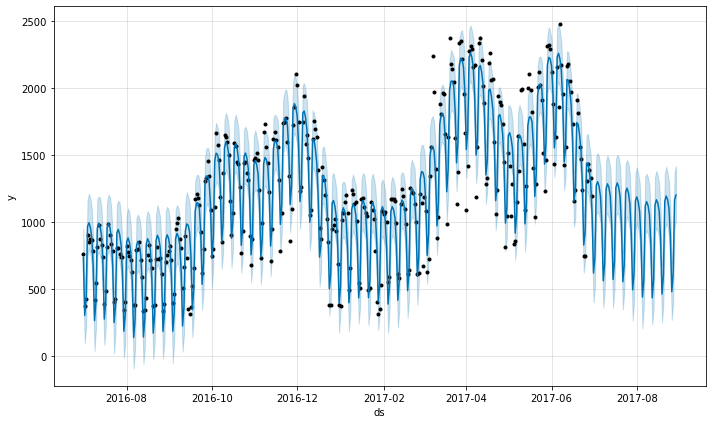

In [28]:
m.plot(forecast);

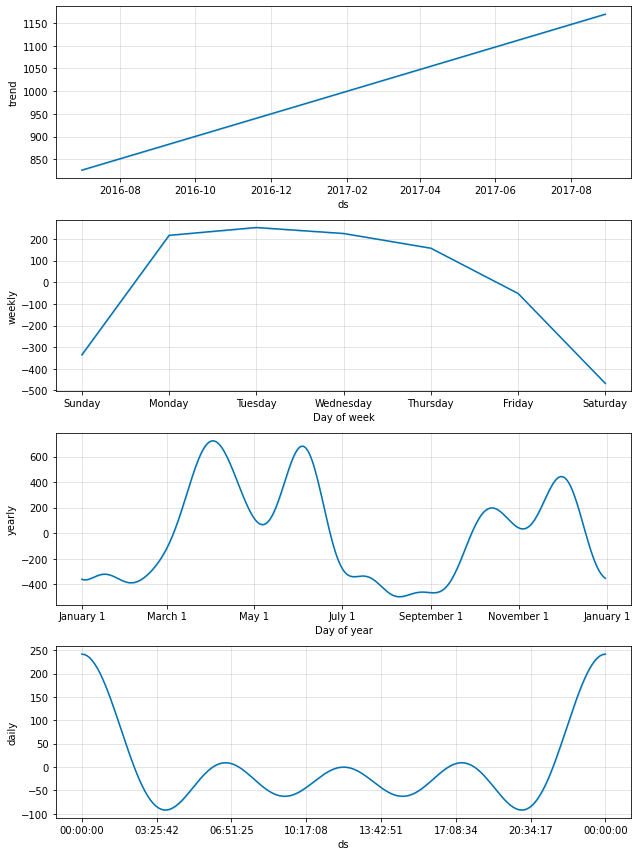

In [29]:
m.plot_components(forecast);

In [52]:
from pandas_datareader import data
import yfinance as yf
yf.pdr_override()

start_date = '1990-1-1'
end_date = '2021-6-20'

KIA = data.get_data_yahoo('000270.KS', start_date, end_date)
KIA.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,7404.519043,7665.241699,7300.229980,7665.241699,5565.034668,636300
2000-01-05,7404.519043,7404.519043,7248.085449,7248.085449,5262.176758,686100
2000-01-06,7331.516602,7519.236816,6935.218262,6935.218262,5035.031738,379000
2000-01-07,6987.362793,7143.796387,6778.785156,6778.785156,4921.458984,701400
2000-01-10,6841.358398,7102.081055,6810.071777,7091.651855,5148.604004,1076700


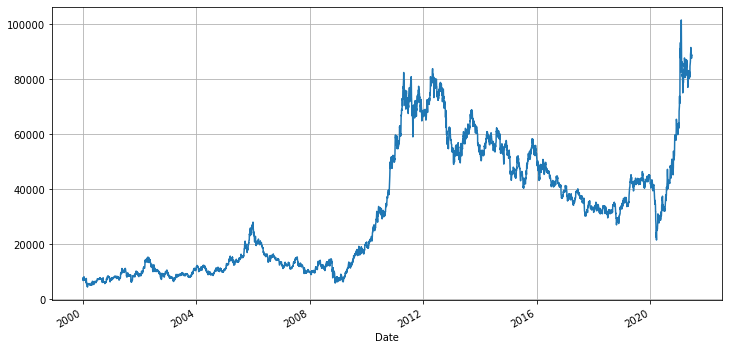

In [53]:
KIA['Close'].plot(figsize = (12, 6), grid = True);

In [54]:
KIA_trunc = KIA[:'2021-06-23']
KIA_trunc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,7404.519043,7665.241699,7300.229980,7665.241699,5565.034668,636300
2000-01-05,7404.519043,7404.519043,7248.085449,7248.085449,5262.176758,686100
2000-01-06,7331.516602,7519.236816,6935.218262,6935.218262,5035.031738,379000
2000-01-07,6987.362793,7143.796387,6778.785156,6778.785156,4921.458984,701400
2000-01-10,6841.358398,7102.081055,6810.071777,7091.651855,5148.604004,1076700
...,...,...,...,...,...,...
2021-06-14,89200.000000,89500.000000,87600.000000,88500.000000,88500.000000,2159724
2021-06-15,88100.000000,88900.000000,87000.000000,88400.000000,88400.000000,1490830
2021-06-16,88300.000000,89900.000000,88100.000000,89100.000000,89100.000000,1555202


In [55]:
df = pd.DataFrame({'ds': KIA_trunc.index, 'y': KIA_trunc['Close']})
df.reset_index(inplace = True)

# 'ds' 변수를 생성해줬으므로, 'date' 변수는 삭제
del df['Date']

df.head()

,ds,y
0,2000-01-04,7665.241699
1,2000-01-05,7248.085449
2,2000-01-06,6935.218262
3,2000-01-07,6778.785156
4,2000-01-10,7091.651855


In [56]:
# 주기성이 '일단위(daily_seasonality)'로 있다고 알려준다
m = Prophet(daily_seasonality = True)
m.fit(df);

In [60]:
# 1년(365일) 후, 즉, 2017년 12월 31일까지의 데이터를 예측하겠다는 의미
future = m.make_future_dataframe(periods = 3)
future.tail()

,ds
5387,2021-06-17
5388,2021-06-18
5389,2021-06-19
5390,2021-06-20
5391,2021-06-21


In [61]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5387,2021-06-17,57962.836697,49562.893359,66190.848930
5388,2021-06-18,57800.805260,49701.107439,65870.735212
5389,2021-06-19,57866.745945,49496.453986,66069.425791
5390,2021-06-20,57753.790455,49495.349351,65980.055052
5391,2021-06-21,57457.876372,49420.751611,66141.126473


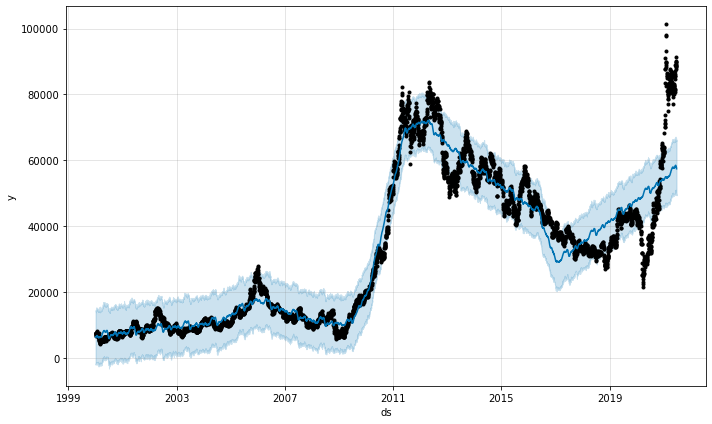

In [62]:
m.plot(forecast);

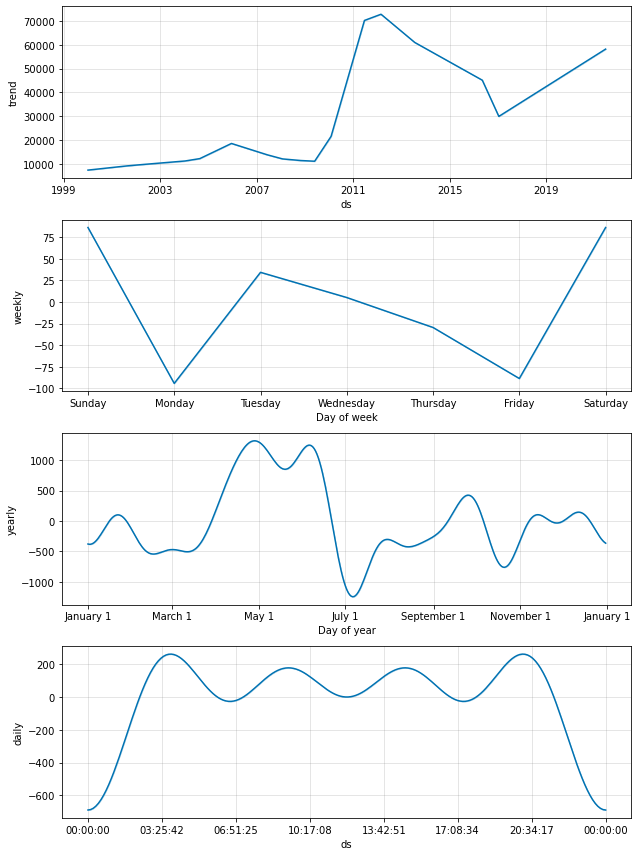

In [63]:
m.plot_components(forecast);